In [53]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss,roc_auc_score, brier_score_loss
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

col = list(range(1,21))

from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

<h1>Caliberation of unbalanced data set</h1>

In [57]:
data_set = make_classification(n_samples=10000,weights=[0.7])
un_bal_data = pd.DataFrame(data=c[0][:], columns=col)
un_bal_data["target"] = c[1]
print(un_bal_data["target"].value_counts())
un_bal_y=un_bal_data["target"]
un_bal_X=un_bal_data.drop(columns=["target"])

0    69827
1    30173
Name: target, dtype: int64


In [61]:
# data = load_breast_cancer()
X_train,X_test, y_train, y_test = train_test_split(
    un_bal_X, un_bal_y, stratify=un_bal_y, test_size=0.3)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(70000, 20) (30000, 20)
(70000,) (30000,)


In [58]:
alpha = [10 ** x for x in range(-5,2)]
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of alpha =  1e-05 The log loss is: 0.3059002409588481
For values of alpha =  0.0001 The log loss is: 0.3045995134333974
For values of alpha =  0.001 The log loss is: 0.30315930704601746
For values of alpha =  0.01 The log loss is: 0.3030791200466701
For values of alpha =  0.1 The log loss is: 0.3085666744729638
For values of alpha =  1 The log loss is: 0.3343666620590421
For values of alpha =  10 The log loss is: 0.35510965145070034


In [67]:
x_train,x_test,y_train,y_test = train_test_split(un_bal_X,un_bal_y,test_size=.2)
# x1_train,x1_test,y1_train,y1_test = train_test_split(x_train,y_train,test_size=.2)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
# print("-"*20)
# print(x1_train.shape)
# print(x1_test.shape)
# print(y1_train.shape)
# print(y1_test.shape)

(80000, 20) (80000,)
(20000, 20) (20000,)


In [68]:
clf = LogisticRegression()
clf.fit(x_train,y_train)
# pred_prob = clf.predict_proba(x_test)[:, 1]
# y_pred = clf.predict(x_test)

LogisticRegression()

In [ ]:
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")

In [49]:
print(roc_auc_score(y_test,pred_prob))
print(brier_score_loss(y_test,pred_prob))
print(log_loss(y_test,y_pred))

0.9642086777131912
0.061875529579241514
2.783853363339858


In [42]:
calibrated_clf = CalibratedClassifierCV(clf, cv=10, method='isotonic')
calibrated_clf.fit(x1_test, y1_test)
y_pred_c = calibrated_clf.predict_proba(x1_test)[:, 1]

In [43]:
print(roc_auc_score(y1_test,y_pred_c))
print(brier_score_loss(y1_test,y_pred_c))
# print(log_loss(y_test,y_pred))

0.9357556588115087
0.09008485759657914


In [29]:
dx = {"Predicted":y_pred,"Probabilities":pred_prob}
data_x = pd.DataFrame(data=dx)

In [28]:
# def Prob_minus(x):
#     print(x)
# data_x["1_Prob"] = data_x["Probabilities"].apply(Prob_minus)

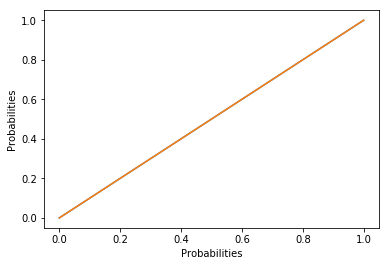

In [33]:
# sns.lineplot(x=data_x["Probabilities"],y=data_x["Probabilities"])
# sns.lineplot(x=data_x["Probabilities"],y=data_x["Probabilities"].sort_values())

In [7]:
c = make_classification(n_samples=50000) #weights=[0.7]
bal_data = pd.DataFrame(data=c[0][:], columns=col)
bal_data["target"] = c[1]
print(bal_data["target"].value_counts())
bal_y=bal_data["target"]
bal_X=bal_data.drop(columns=["target"])

0    25002
1    24998
Name: target, dtype: int64
